# Exploratory Data Analysis

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score

import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.head()

,title,subreddit
0,Majority rule rejected by a majority,0
1,Exorcism shock: Bishop vows to rid city of ‘de...,0
2,WHATCH OUT ! BUTTON ON AND OFF THE ENGINE IN M...,0
3,"CBU instructor fired after demanding sex, food...",0
4,Bishop to spray holy water over city from heli...,0


In [4]:
my_stop = list(ENGLISH_STOP_WORDS) 

### Chose the basic Countvectorizer to transform the title into a matrix so it can be explored further.

In [5]:
cv = CountVectorizer(max_features = 1000, stop_words = my_stop)  
matrix = cv.fit_transform(data['title'])
matrix = matrix.todense()
matrix

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [6]:
len(cv.get_feature_names())

1000

In [7]:
feature_data = pd.DataFrame(matrix, columns = cv.get_feature_names())

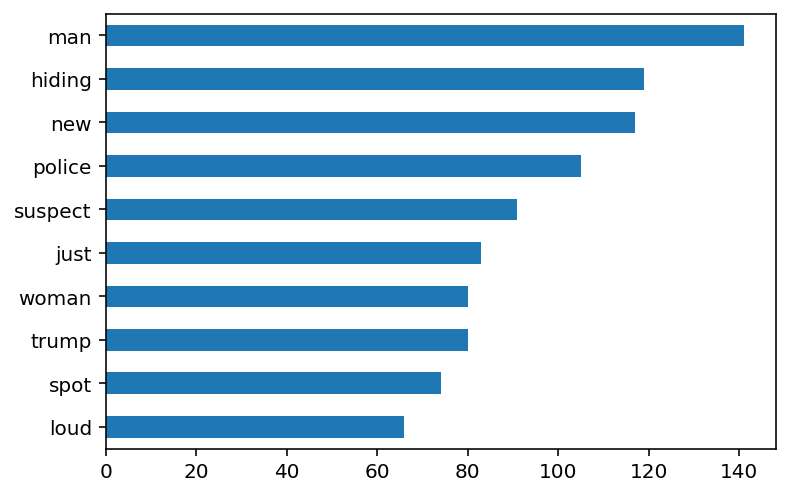

In [8]:
# Top words for full dataframe
feature_data.sum().sort_values(ascending = True).tail(10).plot(kind='barh');

In [9]:
#Not the Onion and Onion becomes their own dataframe
real_df = feature_data[data['subreddit'] == 0].copy()
onion_df = feature_data[data['subreddit'] == 1].copy()

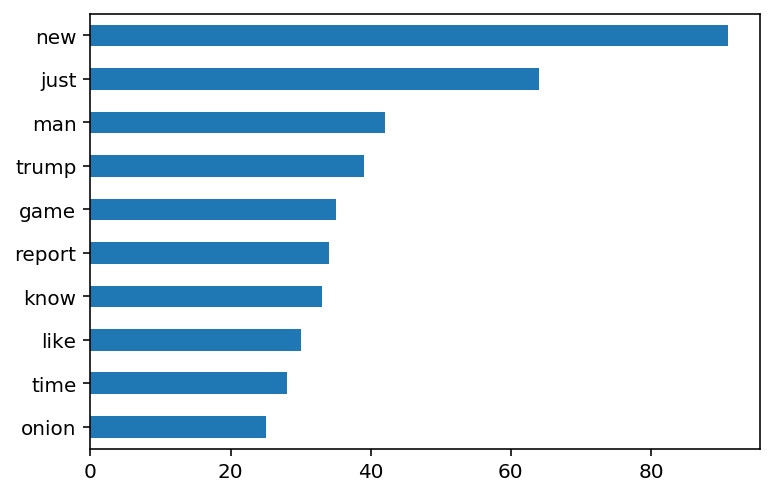

In [10]:
#top words for r/Onion 
onion_list = onion_df.sum().sort_values(ascending=True).tail(10).plot(kind='barh');

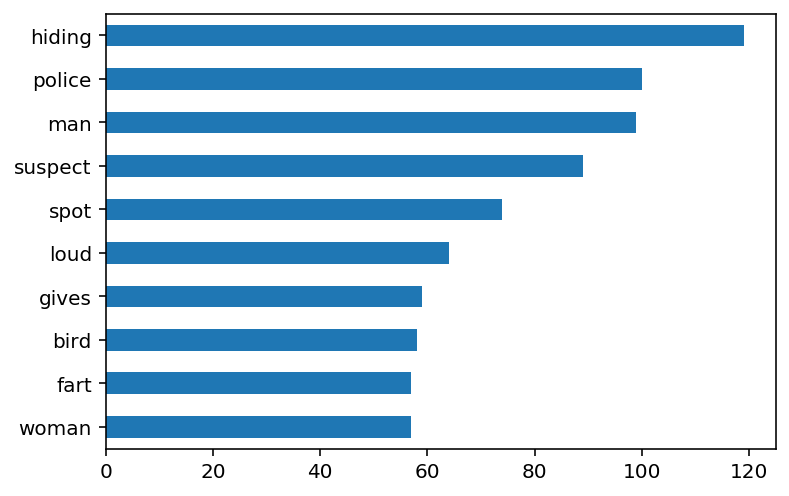

In [11]:
#Tops words for r/nottheonion
real_list = real_df.sum().sort_values(ascending=True).tail(10).plot(kind='barh');

In [12]:
#Real(Not the Onion) Top words with observations
real_top_words = real_df.sum().sort_values(ascending = True).tail(10)
pd.DataFrame(real_top_words)

,0
woman,57
fart,57
bird,58
gives,59
loud,64
spot,74
suspect,89
man,99
police,100
hiding,119


In [13]:
#Onion Top words with observations
onion_top_words = onion_df.sum().sort_values(ascending = True).tail(10)
pd.DataFrame(onion_top_words)

,0
onion,25
time,28
like,30
know,33
report,34
game,35
trump,39
man,42
just,64
new,91


In [14]:
real_top_words_list = real_df.sum().sort_values(ascending = True).tail(10).index

In [15]:
onion_top_words_list = onion_df.sum().sort_values(ascending = True).tail(10).index

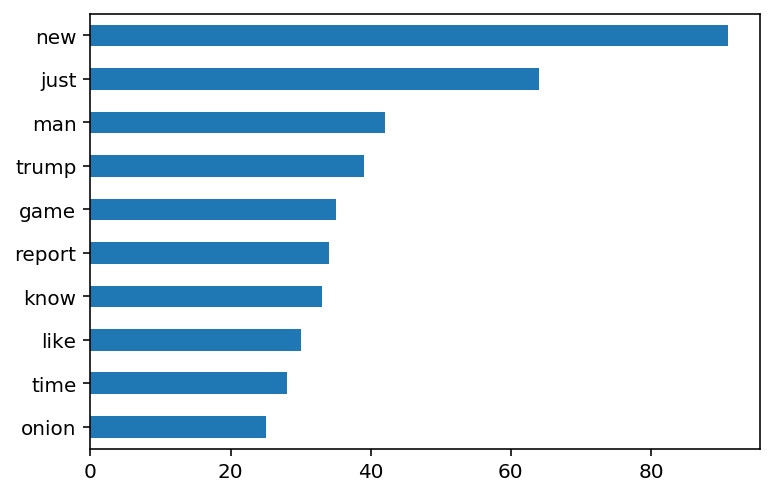

In [16]:
onion_top_words.plot(kind='barh');

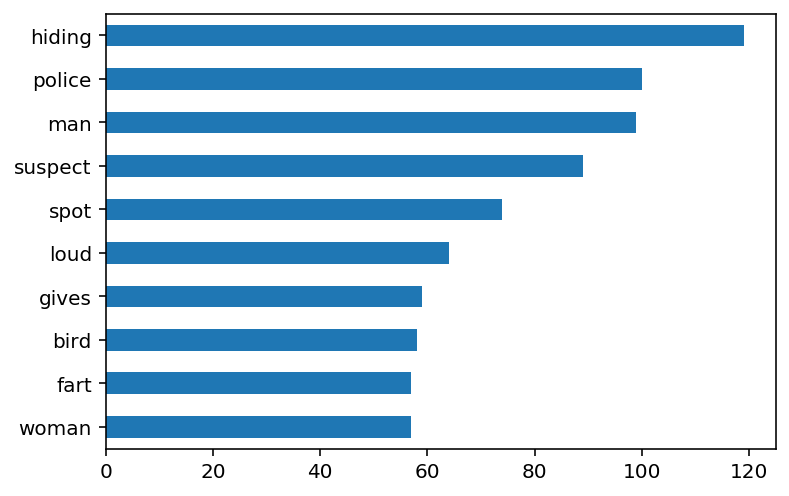

In [17]:
real_top_words.plot(kind='barh');

In [18]:
# Take the top words in Onion and find the frequences of those words in Real news.  
real_words_onion = real_df[onion_top_words_list].sum()
real_words_onion

onion      2
time       8
like      10
know       4
report     3
game       6
trump     41
man       99
just      19
new       26
dtype: int64

In [19]:
# Take the top words in Real news and find the frequencies of those words in Onion dataframe
onion_words_real = onion_df[real_top_words_list].sum()
onion_words_real

woman      23
fart        0
bird        3
gives       4
loud        2
spot        0
suspect     2
man        42
police      5
hiding      0
dtype: int64

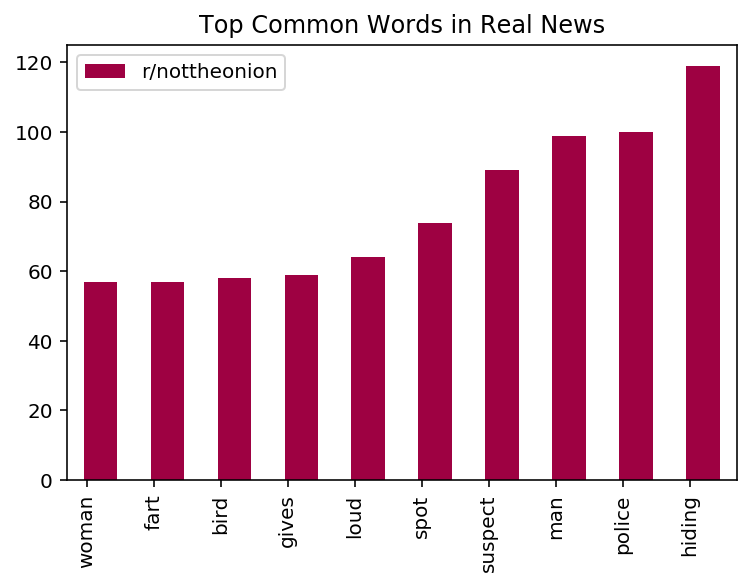

In [20]:

fig,ax = plt.subplots()
real_top_words.plot(ax = ax, title = "Top Common Words in Real News",\
                    legend = True, label = 'r/nottheonion', colormap='Spectral',\
                    position = 0.1, kind='bar');


''

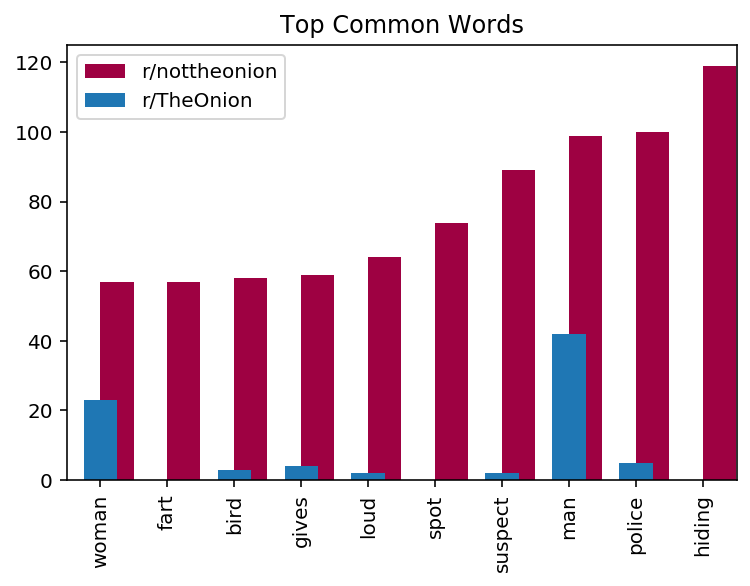

In [21]:
fig, ax = plt.subplots()

real_top_words.plot(ax = ax, title = "Top Common Words",\
                    legend = True, label = 'r/nottheonion', colormap='Spectral', position = 0.01, kind='bar')
onion_words_real.plot(ax = ax, label = 'r/TheOnion', legend = True, kind='bar')
;

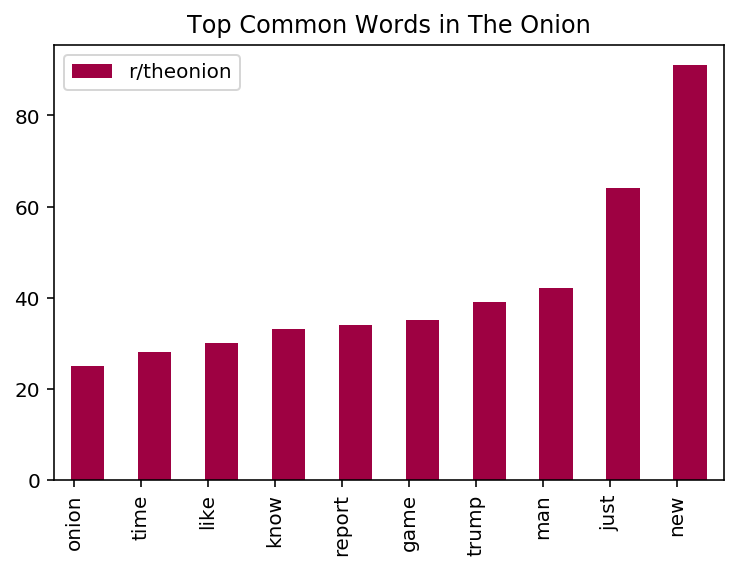

In [22]:

fig,ax = plt.subplots()
onion_top_words.plot(ax = ax, title = "Top Common Words in The Onion",\
                    legend = True, label = 'r/theonion', colormap='Spectral',\
                    position = 0.1, kind='bar');

### Compare how the The Onions most common words compare to those same words from Not the Onion.

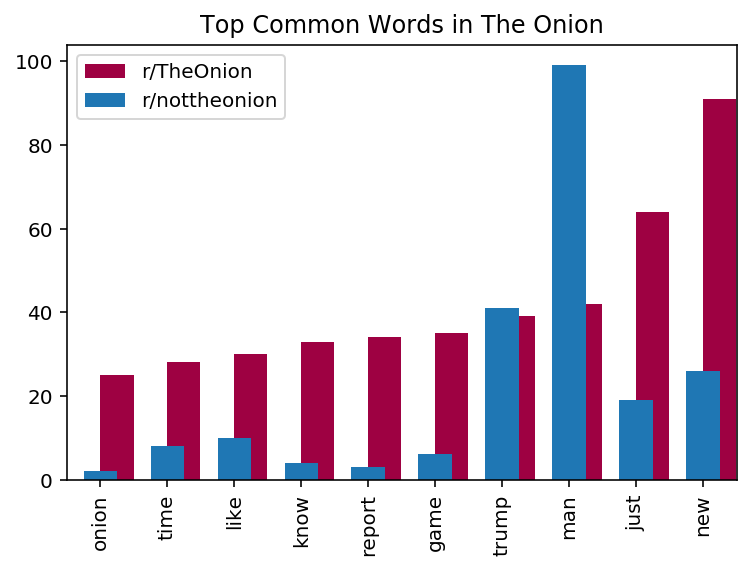

In [29]:
fig, ax = plt.subplots()

onion_top_words.plot(ax = ax, title = "Top Common Words in The Onion",\
                    legend = True, label = 'r/TheOnion', colormap = 'Spectral', \
                     position = 0.01, kind='bar')
real_words_onion.plot(ax = ax, label = 'r/nottheonion', legend = True, kind='bar');